# n-armed bandit

## Problem definition

$n$ possible actions, for this case. $n=10$

An action $a$ means pulling an arm of a slot machine

$k$ is a play of the game where we can choose to pull a single lever

Each lever has a unique probability distribution

$Q_k(a)$ is the expected reward given at play $k$

$$Q_{k}(a)=\frac{R_{1}+R_{2}+\ldots+R_{k}}{k_{a}}$$

The reward at play $k$, $Q_{k}(a)$, is given by the sum of the historical rewards up to play $k$ divided by the total number of rewards

Problem is considered *stationary*, the underlying probability distributions don't change

## Objective

Learn which levers yield the highest reward and pull on those


## Exploration and exploitation

Select the action $a_i$ which maximizes the reward function at play $k$

$$a^{*}=\operatorname{argmax}_{a} Q_{k}\left(a_{i}\right)$$

To find this best action, iterate through the possible future actions and select the best one

In [2]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

# define the probabilities of each slow

n = 10
probs = np.random.rand(n)
eps = 0.2

(array([  2.,  23.,  79., 189.,   0., 394., 537., 471., 247.,  58.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

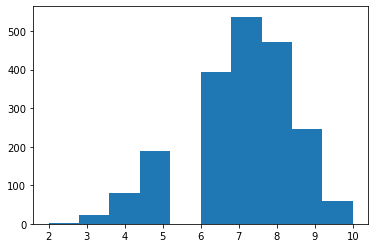

In [13]:
# Define the reward function for pulling a slot up to n-times

def get_reward(prob, n=10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

test_rewards = [get_reward(0.7) for _ in range(2000)]

plt.hist(test_rewards)

## Define the greedy strategy

$$\mu_{n e w}=\frac{k \cdot \mu_{o l d}+x}{k+1}$$

Updating the average return is defined by the previous calculated average multiplied by the play number $k$ plus the new result $x$ divided by the total length $k+1$

In [16]:
# Datastructure to store results

record = np.zeros((n, 2))

# first column = # times each arm has been pulled
# second column = # average reward for arm

record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [19]:
# function for updating the record

def update_record(record, action, r):
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] +     1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

# Function for retrieving the best arm

def get_best_arm(record):
    arm_index = np.argmax(record[:,1], axis=0)
    return arm_index

## Play the game

### Simple strategy

During play, you can either: 

1. Select a random arm and get the reward for it
2. Select the best arm and get the reward for it

Selection of 1 and 2 happens at a fixed probability $\epsilon$

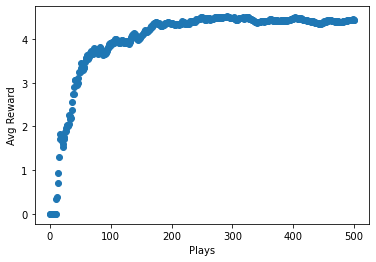

In [21]:
fix, ax = plt.subplots(1,1)
ax.set_xlabel('Plays')
ax.set_ylabel('Avg Reward')

rewards = [0]
eps = 0.2
plays = 500
probs = np.random.rand(n)
record = np.zeros((n, 2))

for i in range(plays):
    if random.random() < eps:
#         strategy 1
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i+1) * rewards[-1] + r) / (i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)), rewards)

## Using a softmax strategy

Use a softmax strategy to select the action that has the highest probability of reward

$$\operatorname{Pr}(A)=\frac{e^{Q_{k}(A) / \tau}}{\sum_{i=1}^{n} e^{Q_{k}(i)/\tau}}$$

$\operatorname{Pr}(A)$ accepts an array of actions and outputs the probability of reward for each action. All actions sum to 1

$\tau$ is called the *temperature*, it scales the probability distribution of actions. High $\tau$ causes probabilites to be very similar, low causes exaggerated differences in the probability distributions between actions



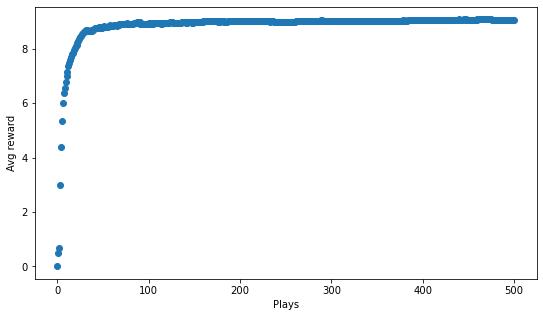

In [23]:
def softmax(av, tau=1.12):
    softm = np.exp(av / tau) / np.sum(np.exp(av/ tau))
    return softm

n = 10
probs = np.random.rand(n)
record = np.zeros((n,2))

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Plays')
ax.set_ylabel('Avg reward')
fig.set_size_inches(9, 5)
rewards = [0]

for i in range(500):
    p = softmax(record[:,1]) 
    choice = np.random.choice(np.arange(n), p=p) # select a choice based off the probabilities
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i+1) * rewards[-1] + r) / (i+2)
    rewards.append(mean_reward)

ax.scatter(np.arange(len(rewards)), rewards)